#### Web scraping
##### URL: https://www.espncricinfo.com/

In [1]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import re

In [3]:
req = requests.get('https://www.espncricinfo.com/series/indian-premier-league-2023-1345038/gujarat-titans-vs-chennai-super-kings-1st-match-1359475/full-scorecard')
soup = BeautifulSoup(req.text,'html.parser')

## Batting table

Note: The first match's html structure is different from the rest of the matches (there are different no. of columns). Hence, I have scraped the first match's data seprately and appended the rest later

In [4]:
# Match names
team1 = soup.find("span", class_="ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate")
team2 = team1.find_next("span", class_="ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate")
match_name = f"{team1.text} Vs {team2.text}"
match_name

'Chennai Super Kings Vs Gujarat Titans'

In [5]:
# to get rid of raw characters  
def cleanString(s):
  return re.sub(r'\(.*?\)', '', re.sub(r'[^\x00-\x7F]', '', s))

In [6]:
# Team names
batting_team = []
names = soup.find_all("span", class_="ds-text-tight-s ds-font-medium ds-text-typo ds-underline ds-decoration-ui-stroke hover:ds-text-typo-primary hover:ds-decoration-ui-stroke-primary ds-block")
players = [(name.span.text.strip()) for name in names if name.span]
players = [cleanString(player) for player in players]
count = 1
for name in names:
  count+=1
  if name.span == None:
    break
count = count-1
for i in range(count-1):
  batting_team.append(team1.text)

for i in range(len(players)-count + 1):
  batting_team.append(team2.text)

In [7]:
# runs
# prints run values of both the tables
tables = soup.find_all("table", class_="ds-w-full ds-table ds-table-md ds-table-auto ci-scorecard-table")
values = []
for table in tables:
  rows = table.find_all('td', class_="ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right")
  for row in rows:
    values.append(row.text)
runs = values[0::5]
balls = values[1::5]
fours = values[2::5]
sixes = values[3::5]
strike_rate = values[4::5]

In [8]:
data = {
    "Match name": match_name,
    "Team name": batting_team,
    "Batsman name": players,
    "Runs": runs,
    "Balls": balls,
    "4s" : fours,
    "6s": sixes,
    "Strike rate": strike_rate
}


In [9]:
df = pd.DataFrame(data)

In [10]:
df

,Match name,Team name,Batsman name,Runs,Balls,4s,6s,Strike rate
0,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,Devon Conway,1,6,0,0,16.66
1,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,Ruturaj Gaikwad,92,50,4,9,184.00
2,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,Moeen Ali,23,17,4,1,135.29
3,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,Ben Stokes,7,6,1,0,116.66
4,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,Ambati Rayudu,12,12,0,1,100.00
5,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,Shivam Dube,19,18,0,1,105.55
6,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,Ravindra Jadeja,1,2,0,0,50.00
7,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,MS Dhoni,14,7,1,1,200.00
8,Chennai Super Kings Vs Gujarat Titans,Chennai Super Kings,Mitchell Santner,1,3,0,0,33.33
9,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Wriddhiman Saha,25,16,2,2,156.25


## Using the main page for collecting all the URLs

In [11]:
link_url = "https://www.espncricinfo.com/series/indian-premier-league-2023-1345038/match-schedule-fixtures-and-results"
req_url = requests.get(link_url)
soup_url = BeautifulSoup(req_url.text,"html.parser")

In [12]:
# storing all the links in "urls" variable
urls = soup_url.find_all("div", class_="ds-grow ds-px-4 ds-border-r ds-border-line-default-translucent")
urls = [url.a['href'] for url in urls]
urls[0]

'/series/indian-premier-league-2023-1345038/gujarat-titans-vs-chennai-super-kings-1st-match-1359475/full-scorecard'

In [13]:
# Dropping the 1st link (CSK vs Gujarat Titans) as it's already added to the dataframe
urls = urls[1::]
urls[0]

'/series/indian-premier-league-2023-1345038/punjab-kings-vs-kolkata-knight-riders-2nd-match-1359476/full-scorecard'

In [14]:
print(f"https://www.espncricinfo.com/{urls[i]}")

https://www.espncricinfo.com//series/indian-premier-league-2023-1345038/rajasthan-royals-vs-punjab-kings-8th-match-1359482/full-scorecard


In [15]:
# df = pd.DataFrame()
for index in range(len(urls)):
  req = requests.get(f"https://www.espncricinfo.com/{urls[index]}")
  soup = BeautifulSoup(req.text,'html.parser')

  try:
    # match names
    team1 = soup.find("span", class_="ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate")
    team2 = team1.find_next("span", class_="ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate")
    match_name = f"{team1.text} Vs {team2.text}"

    # team names
    batting_team = []
    names = soup.find_all("span", class_="ds-text-tight-s ds-font-medium ds-text-typo ds-underline ds-decoration-ui-stroke hover:ds-text-typo-primary hover:ds-decoration-ui-stroke-primary ds-block")
    players = [(name.span.text.strip()) for name in names if name.span]
    players = [cleanString(player) for player in players] # cleaning the strings
    count = 1
    for name in names:
      count+=1
      if name.span == None:
        break
    count = count-1
    for i in range(count-1):
      batting_team.append(team1.text)


    for i in range(len(players)-count + 1):
      batting_team.append(team2.text)

    # run, 4s, 6s.. sk -> storing all these in "values" varible

    tables = soup.find_all("table", class_="ds-w-full ds-table ds-table-md ds-table-auto ci-scorecard-table")
    values = []
    for table in tables:
      rows = table.find_all('td', class_="ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right")
      for row in rows:
        values.append(row.text)
    # splitting them    
    runs = values[0::6]
    balls = values[1::6]
    fours = values[3::6]
    sixes = values[4::6]
    strike_rate = values[5::6]

    # storing all the values in a dict to convert it as a pd
    data = {
          # "S.No": list(range(1, len(runs)+1)),
          "Match name": match_name,
          "Team name": batting_team,
          "Batsman name": players,
          "Runs": runs,
          "Balls": balls,
          "4s" : fours,
          "6s": sixes,
          "Strike rate": strike_rate
      }
    
  
    df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
    print(f"Match {index+1} successfully stored. url: https://www.espncricinfo.com/{urls[index]}") 
    

  except Exception as e:
    print(f"{e} found at {index+1}th position. url: https://www.espncricinfo.com/{urls[i]}")
    print(f''' 
          No of players:{len(players)} ,
          No of Balls:{len(balls)} ,
          ''')

print("\nData successfuly stored")
    

Match 1 successfully stored. url: https://www.espncricinfo.com//series/indian-premier-league-2023-1345038/punjab-kings-vs-kolkata-knight-riders-2nd-match-1359476/full-scorecard
Match 2 successfully stored. url: https://www.espncricinfo.com//series/indian-premier-league-2023-1345038/lucknow-super-giants-vs-delhi-capitals-3rd-match-1359477/full-scorecard
Match 3 successfully stored. url: https://www.espncricinfo.com//series/indian-premier-league-2023-1345038/sunrisers-hyderabad-vs-rajasthan-royals-4th-match-1359478/full-scorecard
Match 4 successfully stored. url: https://www.espncricinfo.com//series/indian-premier-league-2023-1345038/royal-challengers-bangalore-vs-mumbai-indians-5th-match-1359479/full-scorecard
Match 5 successfully stored. url: https://www.espncricinfo.com//series/indian-premier-league-2023-1345038/chennai-super-kings-vs-lucknow-super-giants-6th-match-1359480/full-scorecard
Match 6 successfully stored. url: https://www.espncricinfo.com//series/indian-premier-league-2023-

In [16]:
# converting string values to int
try:  
  df['4s'] = pd.to_numeric(df['4s'])
  df['6s'] = pd.to_numeric(df['6s'])
  df['Runs'] = pd.to_numeric(df['Runs'])
  df['Balls'] = pd.to_numeric(df['Balls'])
  df['Strike rate'] = pd.to_numeric(df['Strike rate'], downcast="float")

except Exception as e:
  print(f"{e} found. Null value")

Unable to parse string "-" at position 159 found. Null value


In [17]:
df.to_csv("batting_summary.csv")

### Top 10 batsmen who scored the most throught the entire tournament

In [18]:
total_runs = df.groupby('Batsman name')['Runs'].sum()
total_runs = total_runs.sort_values(ascending=False).head(20) # top 20 teams

top_batsman = []
top_runs = []
for batsman, runs in total_runs.items():
    top_batsman.append(batsman)
    top_runs.append(runs)

In [19]:
df.columns

Index(['Match name', 'Team name', 'Batsman name', 'Runs', 'Balls', '4s', '6s',
       'Strike rate'],
      dtype='object')

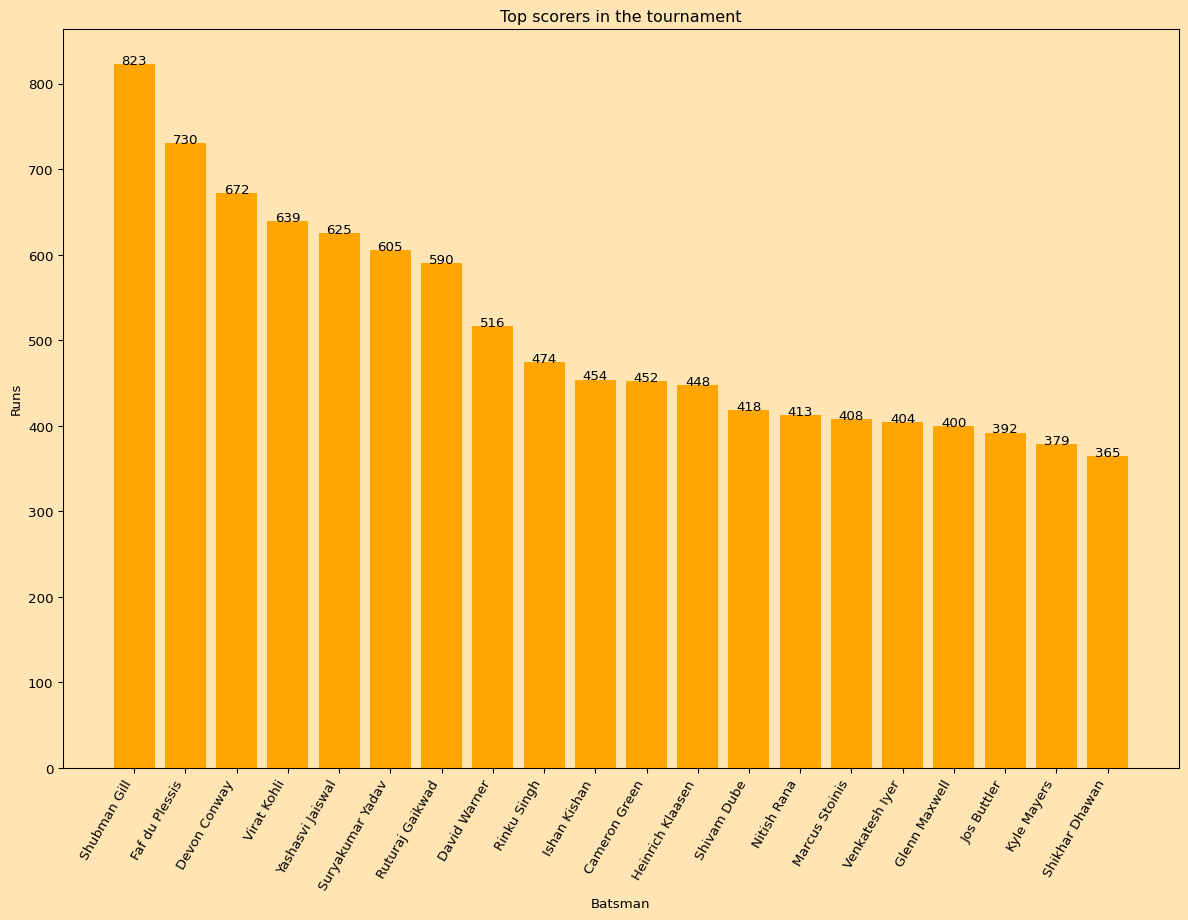

In [20]:
# bar plots
import matplotlib.pyplot as plt
import seaborn as sns
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha ='center')
        
fig, ax = plt.subplots(figsize=(15,10), dpi = 96, facecolor="#ffe5b4")
ax.set_facecolor("#ffe5b4")
ax.bar(top_batsman, top_runs, color="orange")
plt.ylabel("Runs")
plt.xlabel("Batsman")
plt.title("Top scorers in the tournament")
addlabels(top_batsman, top_runs)
plt.xticks(rotation=60, ha='right')
plt.show()  

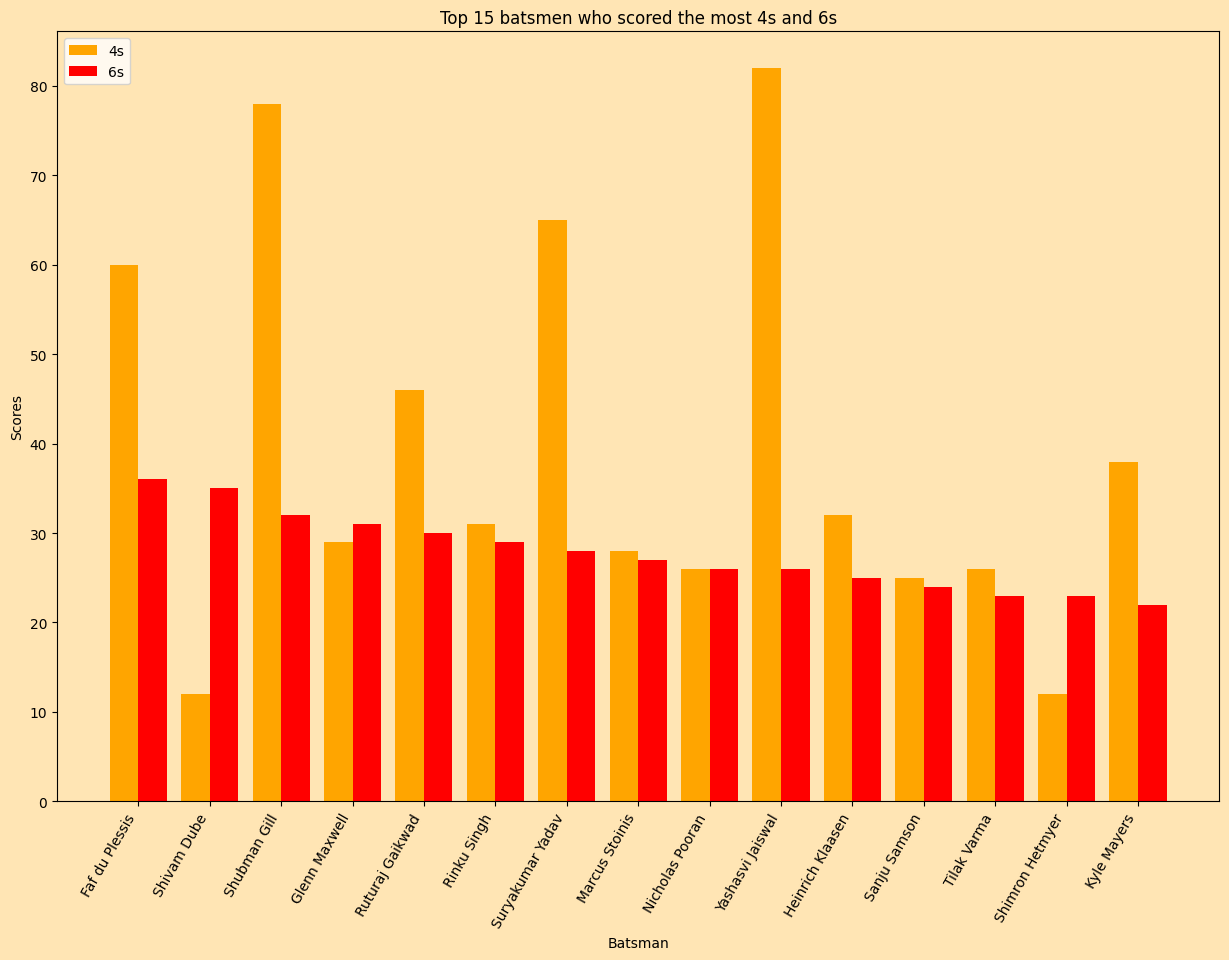

In [21]:
# stacked bar plots
fours_sixes_counts = df.groupby("Batsman name")[["4s", "6s"]].sum()

fours_sixes_counts = fours_sixes_counts.sort_values("6s", ascending=False).head(15)

fours = list(fours_sixes_counts['4s'])
sixes = list(fours_sixes_counts['6s'])
batsman = fours_sixes_counts.index

X_axis = np.arange(len(batsman))

fig,ax = plt.subplots(figsize=(15,10), facecolor="#ffe5b4")
ax.set_facecolor("#ffe5b4")
plt.bar(X_axis - 0.2, fours, 0.4, label = '4s', color = 'orange')
plt.bar(X_axis + 0.2, sixes, 0.4, label = '6s', color = 'red')

plt.xticks(X_axis, batsman, rotation=60, ha='right')
plt.xlabel("Batsman")
plt.ylabel("Scores")
plt.title("Top 15 batsmen who scored the most 4s and 6s")
plt.legend(loc='upper left')
plt.show()

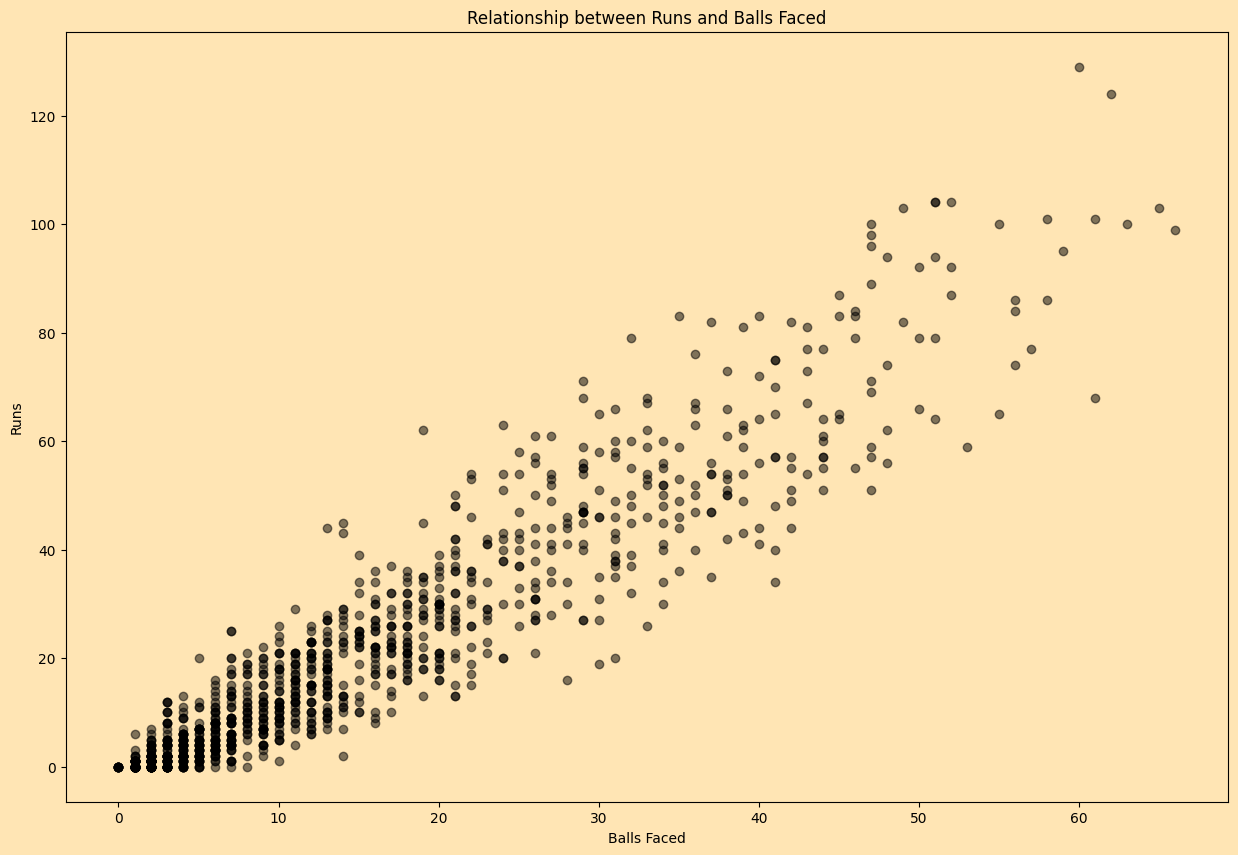

In [22]:
# scatter plot
runs = df['Runs']
balls_faced = df['Balls']

fig,ax = plt.subplots(figsize=(15,10), facecolor="#ffe5b4")
ax.set_facecolor("#ffe5b4")
plt.scatter(balls_faced, runs, alpha=0.5,  facecolor="black")

plt.xlabel('Balls Faced')
plt.ylabel('Runs')
plt.title('Relationship between Runs and Balls Faced')

plt.show()


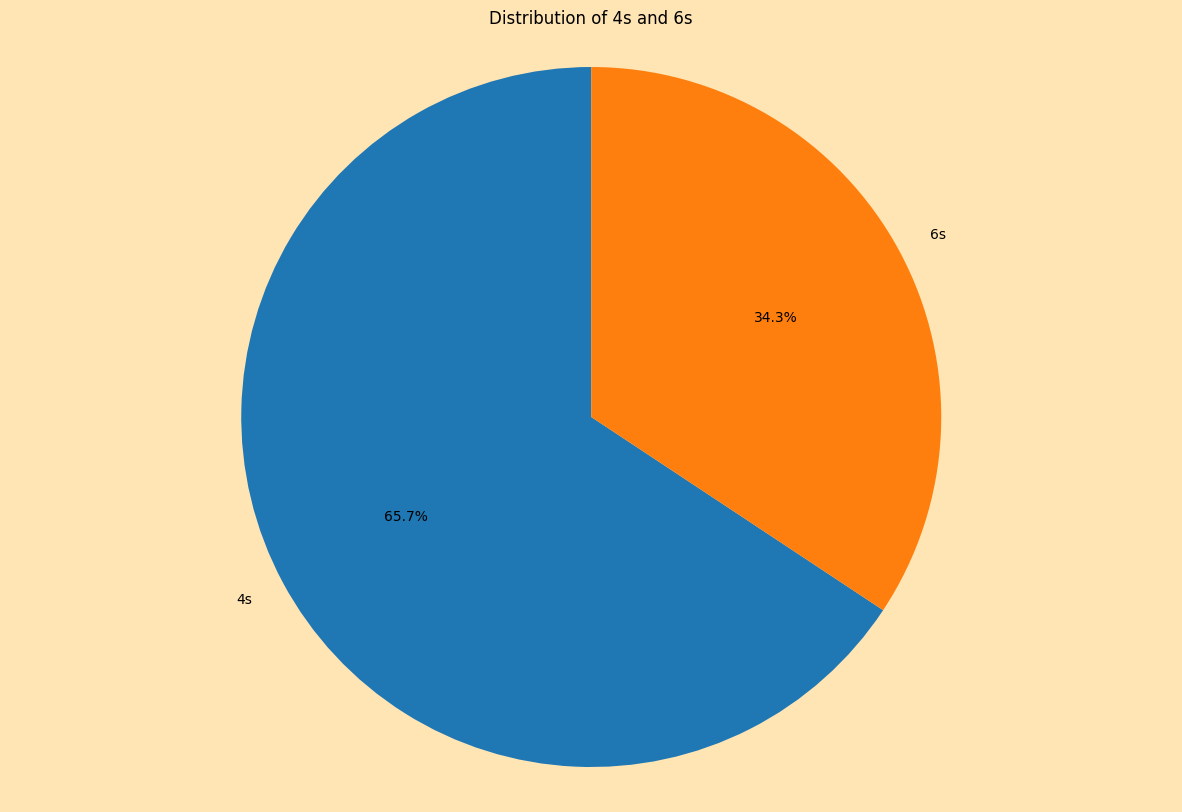

In [25]:
total_4s = df['4s'].sum()
total_6s = df['6s'].sum()

data = pd.DataFrame({'Count': [total_4s, total_6s]}, index=['4s', '6s'])
fig,ax = plt.subplots(figsize=(15,10), facecolor="#ffe5b4")
ax.set_facecolor("#ffe5b4")

plt.pie(data['Count'], labels=data.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of 4s and 6s')
plt.show()

In [24]:
from sqlalchemy import create_engine, text
import sqlalchemy
import pymysql
from urllib.parse import quote_plus
from dotenv import load_dotenv
import os

load_dotenv()
# Defining our connection variables
username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
port = os.getenv("port")
dbname = os.getenv("dbname")

# I have used quote_plus to avert any error(s) when there exists white spaces and other symbols in password
engine = sqlalchemy.create_engine(f'mysql+pymysql://{username}:%s@{host}:{port}/{dbname}' % quote_plus(password))
con = engine.connect()

df.to_sql(name = "batting_summary_vishnu", con = engine, if_exists="replace")
# engine.connect().execute(text("COMMIT;"))

# displaying 1st 10 records from the database
sql = text("select * from batting_summary_vishnu limit 10;")
res = con.execute(sql)

for i in res:
  print(i)

# Close the database connection
con.close()


(0, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'Devon Conway', 1, 6, 0, 0, '16.66')
(1, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'Ruturaj Gaikwad', 92, 50, 4, 9, '184.00')
(2, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'Moeen Ali', 23, 17, 4, 1, '135.29')
(3, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'Ben Stokes', 7, 6, 1, 0, '116.66')
(4, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'Ambati Rayudu', 12, 12, 0, 1, '100.00')
(5, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'Shivam Dube', 19, 18, 0, 1, '105.55')
(6, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'Ravindra Jadeja', 1, 2, 0, 0, '50.00')
(7, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'MS Dhoni', 14, 7, 1, 1, '200.00')
(8, 'Chennai Super Kings Vs Gujarat Titans', 'Chennai Super Kings', 'Mitchell Santner', 1, 3, 0, 0, '33.33')
(9, 'Chennai Super Kings Vs Gujarat Tit